# Mini Project 1- Dr. Semmelweis and the Discovery of Handwashing

# Task 1 

In [1]:
import pandas as pd

In [2]:
yearly= pd.read_csv("yearly_deaths_by_clinic.csv")

In [3]:
yearly.sample(5)

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
4,1845,3492,241,clinic 1
8,1843,2739,164,clinic 2
10,1845,3241,66,clinic 2
1,1842,3287,518,clinic 1


In [4]:
yearly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    12 non-null     int64 
 1   births  12 non-null     int64 
 2   deaths  12 non-null     int64 
 3   clinic  12 non-null     object
dtypes: int64(3), object(1)
memory usage: 512.0+ bytes


# Task 2 The alarming number of deaths

The table above shows the number of women giving birth at the two clinics at the Vienna General Hospital for the years 1841 to 1846. You'll notice that giving birth was very dangerous; an alarming number of women died as the result of childbirth, most of them from childbed fever.

We see this more clearly if we look at the proportion of deaths out of the number of women giving birth. Let's zoom in on the proportion of deaths at Clinic 1.

In [5]:
yearly['proportion_deaths'] = yearly['deaths']/yearly['births']

In [6]:
yearly

,year,births,deaths,clinic,proportion_deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464
6,1841,2442,86,clinic 2,0.035217
7,1842,2659,202,clinic 2,0.075968
8,1843,2739,164,clinic 2,0.059876
9,1844,2956,68,clinic 2,0.023004


In [7]:
yearly1=yearly[yearly['clinic']=='clinic 1']

In [8]:
yearly1


,year,births,deaths,clinic,proportion_deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464


In [9]:
yearly2=yearly[yearly['clinic']=='clinic 2']

In [10]:
yearly2

,year,births,deaths,clinic,proportion_deaths
6,1841,2442,86,clinic 2,0.035217
7,1842,2659,202,clinic 2,0.075968
8,1843,2739,164,clinic 2,0.059876
9,1844,2956,68,clinic 2,0.023004
10,1845,3241,66,clinic 2,0.020364
11,1846,3754,105,clinic 2,0.027970


# Task 3  Death at the clinics

 If we now plot the proportion of deaths at both clinic 1 and clinic 2 we'll see a curious pattern...

Text(0, 0.5, 'proportion_deaths')

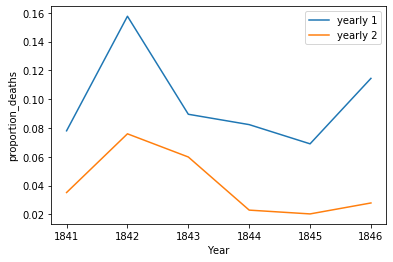

In [11]:
# Plotting yearly proportion of deaths at the two clinics
ax = yearly1.plot(y="proportion_deaths", x="year",
              label="yearly 1")
yearly2.plot(y="proportion_deaths", x="year",
         label="yearly 2", ax=ax)
ax.set_xlabel("Year")
ax.set_ylabel("proportion_deaths")

# Task 4 The handwashing begins

Why is the proportion of deaths constantly so much higher in Clinic 1? Semmelweis saw the same pattern and was puzzled and distressed. The only difference between the clinics was that many medical students served at Clinic 1, while mostly midwife students served at Clinic 2. While the midwives only tended to the women giving birth, the medical students also spent time in the autopsy rooms examining corpses.

Semmelweis started to suspect that something on the corpses, spread from the hands of the medical students, caused childbed fever. So in a desperate attempt to stop the high mortality rates, he decreed: Wash your hands! This was an unorthodox and controversial request, nobody in Vienna knew about bacteria at this point in time.

Let's load in monthly data from Clinic 1 to see if the handwashing had any effect.

In [12]:
# Read datasets/monthly_deaths.csv into monthly
monthly = pd.read_csv("monthly_deaths.csv", parse_dates=["date"])

In [13]:
# proportion of deaths per no. births
monthly['proportion_deaths'] = monthly['deaths']/monthly['births']

In [14]:
#first few rows in monthly
monthly.head()

,date,births,deaths,proportion_deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843


# Task 5 The effect of handwashing

With the data loaded we can now look at the proportion of deaths over time. In the plot below we haven't marked where obligatory handwashing started, but it reduced the proportion of deaths to such a degree that you should be able to spot it!

Text(0, 0.5, 'proportion_deaths')

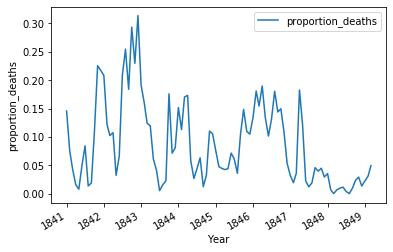

In [15]:
# Plotting monthly proportion of deaths
ax = monthly.plot(y="proportion_deaths", x="date")
ax.set_xlabel("Year")
ax.set_ylabel("proportion_deaths")

# Task 6 The effect of handwashing highlighted

Starting from the summer of 1847 the proportion of deaths is drastically reduced and, yes, this was when Semmelweis made handwashing obligatory.

The effect of handwashing is made even more clear if we highlight this in the graph.

In [16]:
# Date when handwashing was made mandatory
handwashing_start=pd.to_datetime('1847-06-01')

In [17]:
print(type(handwashing_start))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [18]:
# Spliting monthly into before and after handwashing_start
before_washing = monthly[monthly['date'] < handwashing_start]

In [19]:
before_washing

,date,births,deaths,proportion_deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843
...,...,...,...,...
71,1847-01-01,311,10,0.032154
72,1847-02-01,312,6,0.019231
73,1847-03-01,305,11,0.036066
74,1847-04-01,312,57,0.182692


In [20]:
after_washing = monthly[monthly['date'] >= handwashing_start]

In [21]:
after_washing

,date,births,deaths,proportion_deaths
76,1847-06-01,268,6,0.022388
77,1847-07-01,250,3,0.012000
78,1847-08-01,264,5,0.018939
79,1847-09-01,262,12,0.045802
80,1847-10-01,278,11,0.039568
81,1847-11-01,246,11,0.044715
82,1847-12-01,273,8,0.029304
83,1848-01-01,283,10,0.035336
84,1848-02-01,291,2,0.006873
85,1848-03-01,276,0,0.000000


Text(0, 0.5, 'proportion_deaths')

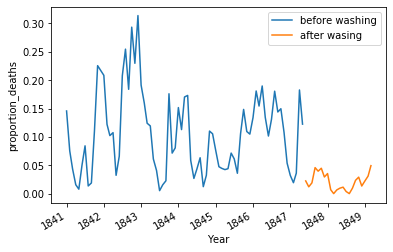

In [22]:
# Plot monthly proportion of deaths before and after handwashing
ax = before_washing.plot(y="proportion_deaths", x="date",
              label="before washing")
after_washing.plot(y="proportion_deaths", x="date",
         label="after wasing", ax=ax)
ax.set_xlabel("Year")
ax.set_ylabel("proportion_deaths")

# Task 7 More handwashing, fewer deaths?

Again, the graph shows that handwashing had a huge effect. How much did it reduce the monthly proportion of deaths on average?

In [23]:
# Difference in mean monthly proportion of deaths due to handwashing
before_proportion = before_washing['proportion_deaths']
after_proportion = after_washing['proportion_deaths']

In [24]:
a=before_proportion.mean()

In [25]:
b=after_proportion.mean()

In [31]:
mean_diff = a-b

In [32]:
mean_diff

0.0839566075118334

# Task 8 A Bootstrap analysis of Semmelweis handwashing data

It reduced the proportion of deaths by around 8 percentage points! From 10% on average to just 2% (which is still a high number by modern standards).

To get a feeling for the uncertainty around how much handwashing reduces mortalities we could look at a confidence interval (here calculated using the bootstrap method).

In [37]:
# A bootstrap analysis of the reduction of deaths due to handwashing
boot_mean_diff = []
for i in range(3000):
    boot_before = before_proportion.sample(frac=1, replace=True) 
    boot_after = after_proportion.sample(frac=1, replace=True)
    boot_mean_diff.append(boot_after.mean() - boot_before.mean())

In [38]:
# Calculating a 95% confidence interval from boot_mean_diff 
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025, 0.975])
confidence_interval

0.025   -0.100968
0.975   -0.066667
dtype: float64

# Task 9 The fate of Dr. Semmelweis

So handwashing reduced the proportion of deaths by between 6.7 and 10 percentage points, according to a 95% confidence interval. All in all, it would seem that Semmelweis had solid evidence that handwashing was a simple but highly effective procedure that could save many lives.

The tragedy is that, despite the evidence, Semmelweis' theory — that childbed fever was caused by some "substance" (what we today know as bacteria) from autopsy room corpses — was ridiculed by contemporary scientists. The medical community largely rejected his discovery and in 1849 he was forced to leave the Vienna General Hospital for good.

One reason for this was that statistics and statistical arguments were uncommon in medical science in the 1800s. Semmelweis only published his data as long tables of raw data, but he didn't show any graphs nor confidence intervals. If he would have had access to the analysis we've just put together he might have been more successful in getting the Viennese doctors to wash their hands.

In [30]:
# The data Semmelweis collected points to that:
doctors_should_wash_their_hands = True